In [14]:
import os
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt
import random
from PIL import Image
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from tqdm import tqdm

seed = 42
random.seed(seed)
np.random.seed(seed)

In [15]:
def create_dataset(root_dir, grayscale=True):
    image_list = []
    target_list = []
    target = 0
    c = 0
    limit = 10
    
    for subdir, dirs, files in os.walk(root_dir):
        for file in files:
            target_list.append(target)
            file_path = os.path.join(subdir, file)
            try:
                with Image.open(file_path) as img:
                    if grayscale:
                        img = img.convert('L')
                    # img = img.resize((32, 32))
                    img_array = np.array(img)
                    image_list.append(img_array)
            except Exception as e:
                print(f"Error loading image {file_path}: {e}")
        target += 1

        if c == limit:
            break
        c += 1

    return (np.array(image_list), np.array(target_list))

In [27]:
dataset_dir = 'C:/Users/enzol/PycharmProjects/5IABD_UnsupervisedDL/data2'

X, y = create_dataset(dataset_dir, grayscale=True)

In [17]:
X = X / 255

In [18]:
X = X.reshape(X.shape[0], X.shape[1], X.shape[2], 1)

In [19]:
x_train, x_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
print(x_train.shape, y_train.shape)
print(x_test.shape, y_test.shape)

(32000, 64, 64, 1) (32000,)
(8000, 64, 64, 1) (8000,)


In [20]:
input_dim = x_train.shape[1:]
input_dim

(64, 64, 1)

In [21]:
from vae import VAE_LEGO as VAE

In [22]:
epochs = 100
batch_size = 512

vae = VAE(input_dim=x_train.shape[1:], encoding_dim=2)

vae.compile(optimizer='adam')

vae.fit(x_train, epochs=epochs, batch_size=batch_size, validation_data=(x_test, None))

Epoch 1/100
63/63 [==============================] - 8s 113ms/step - loss: 2813.1693 - reconstruction_loss: 2772.2607 - kl_loss: 3.5905 - val_loss: 2714.4797 - val_reconstruction_loss: 2709.5701 - val_kl_loss: 4.9095
Epoch 2/100
63/63 [==============================] - 7s 106ms/step - loss: 2709.7091 - reconstruction_loss: 2696.1008 - kl_loss: 4.4630 - val_loss: 2679.0132 - val_reconstruction_loss: 2673.2480 - val_kl_loss: 5.7652
Epoch 3/100
63/63 [==============================] - 7s 105ms/step - loss: 2674.7169 - reconstruction_loss: 2665.6660 - kl_loss: 5.1698 - val_loss: 2661.2820 - val_reconstruction_loss: 2656.2878 - val_kl_loss: 4.9945
Epoch 4/100
63/63 [==============================] - 7s 107ms/step - loss: 2660.0429 - reconstruction_loss: 2651.8687 - kl_loss: 5.0450 - val_loss: 2648.9844 - val_reconstruction_loss: 2643.9463 - val_kl_loss: 5.0384
Epoch 5/100
63/63 [==============================] - 7s 104ms/step - loss: 2639.9892 - reconstruction_loss: 2618.1526 - kl_loss: 5.7

1000/1000 [==============================] - 1s 1ms/step


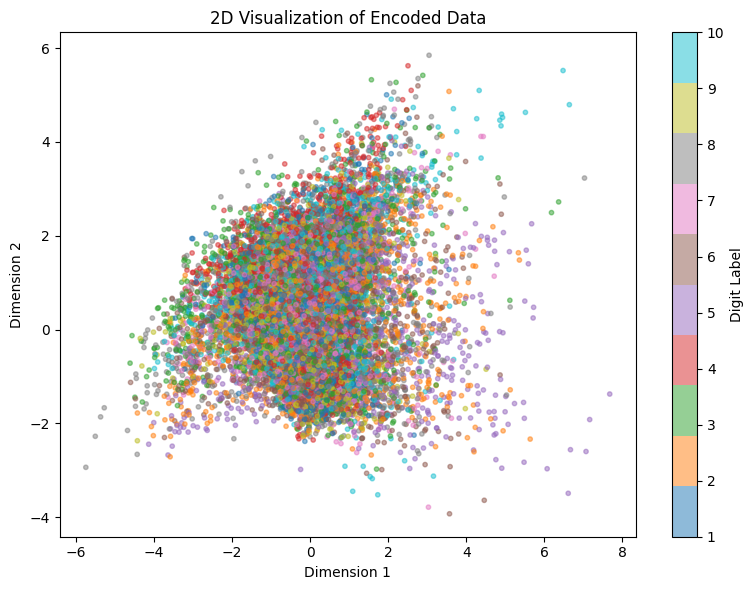

In [23]:
vae.visualize_2d(x_train, y_train)

250/250 [==============================] - 1s 2ms/step


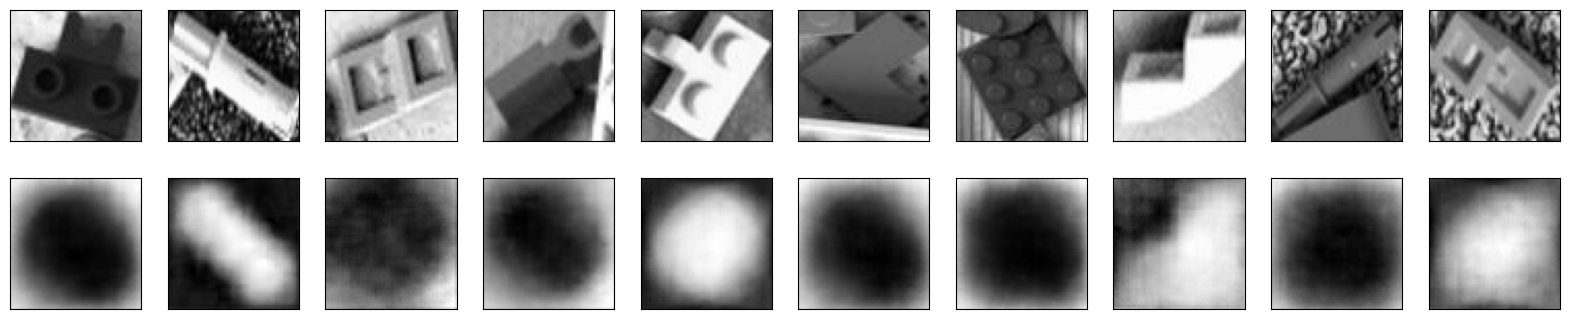

In [24]:
vae.visualize_reconstruction(x_test)

1/1 [==============================] - 0s 106ms/step


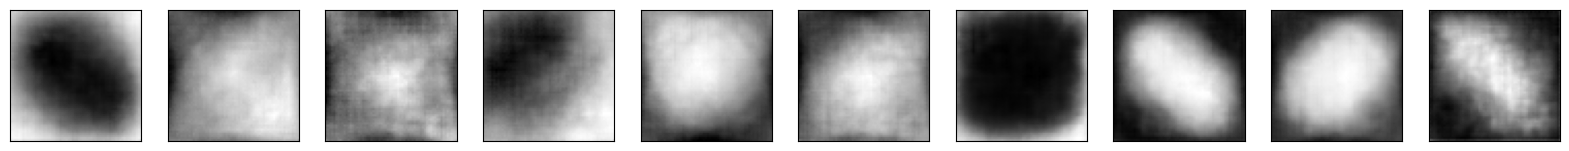

In [25]:
vae.generate_images()

1000/1000 [==============================] - 2s 2ms/step


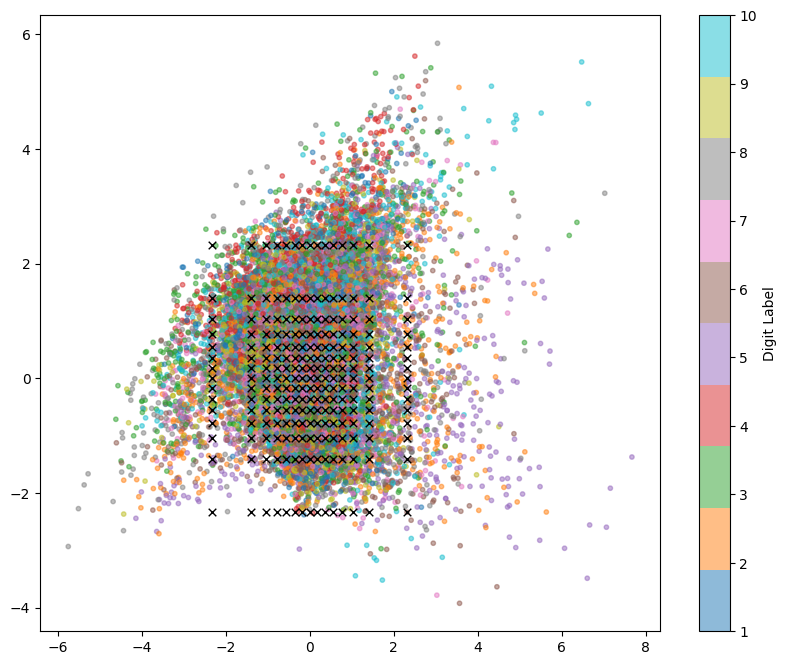

8/8 [==============================] - 0s 7ms/step


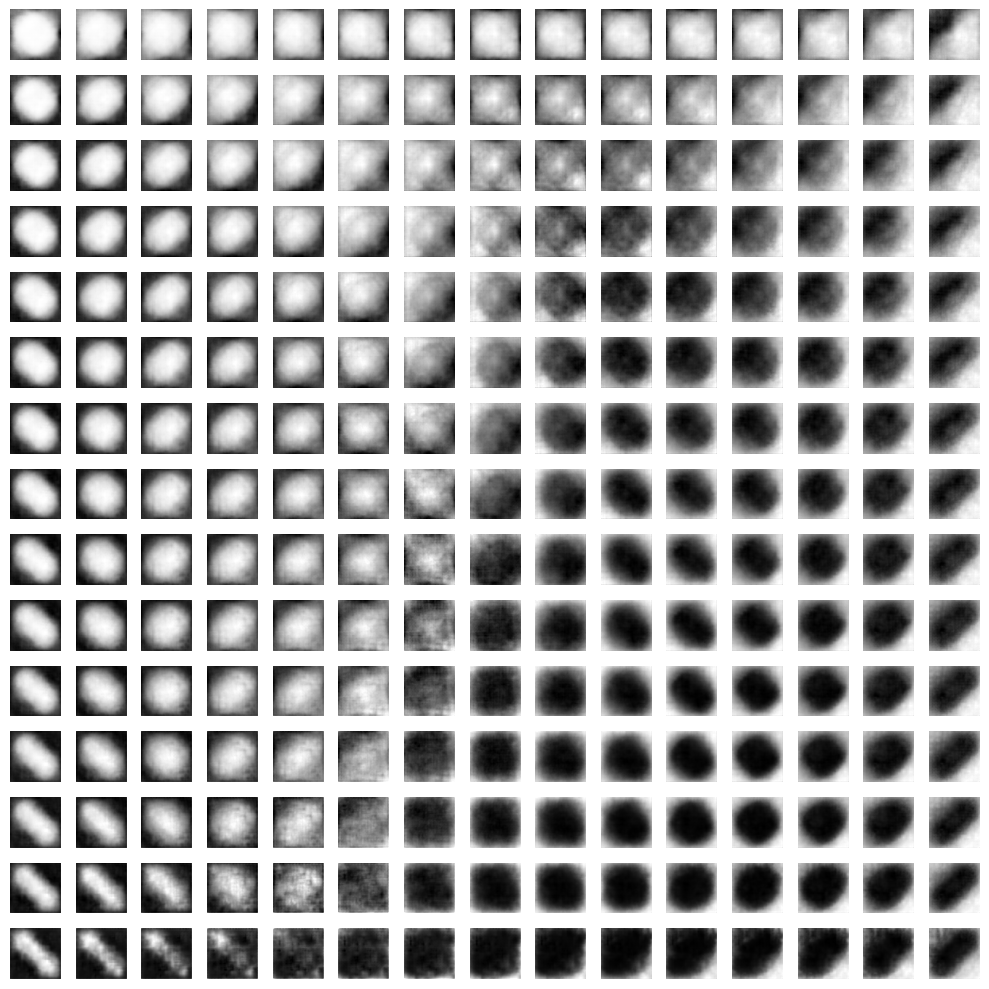

In [26]:
vae.visualize_latent_space_grid(x_train, y_train)